In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE



# RF with data of Experiment 3


## Data preprocessing


In [36]:
df = pd.read_csv('Experiment_3.csv')
df['RSSI-Value-Smoothed'] = df['RSSI-Value'].rolling(window=5).mean()
df['RSSI-Value-Smoothed'] = df['RSSI-Value-Smoothed'].fillna(df['RSSI-Value'])

## RF Classification

In [37]:
bins = [0, 0.2, 0.4, 1.4, 1.8, 2]
labels = ['0-0.2m', '0.2-0.4m', '0.4-1.4m', '1.4-1.8m', '1.8-2m']


df['Distance_category'] = pd.cut(df['Distance'], bins=bins, labels=labels, include_lowest=True)

In [38]:
#X = df[['RSSI-Value']]
X = df[['RSSI-Value-Smoothed']]  # Use smoothed RSSI values
y = df['Distance_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the SMOTE-augmented data
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      0-0.2m       0.95      0.92      0.93       123
    0.2-0.4m       0.57      0.65      0.61        69
    0.4-1.4m       0.78      0.48      0.59       310
    1.4-1.8m       0.33      0.40      0.36       111
      1.8-2m       0.15      0.38      0.22        63

    accuracy                           0.55       676
   macro avg       0.56      0.57      0.54       676
weighted avg       0.66      0.55      0.58       676



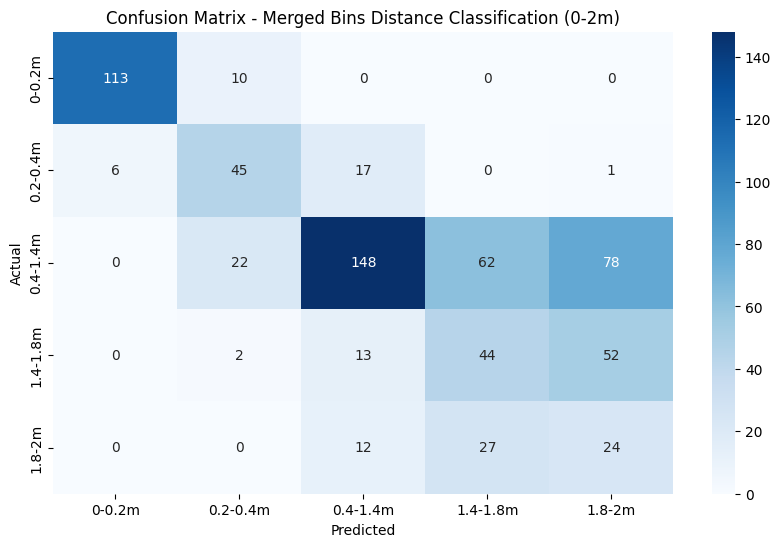

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Merged Bins Distance Classification (0-2m)')
plt.show()

Cross-validation scores for each fold: [0.62885802 0.63734568 0.6566358  0.66975309 0.64583333]
Mean cross-validation score: 0.6476851851851853
Standard deviation of cross-validation score: 0.014365949534243238


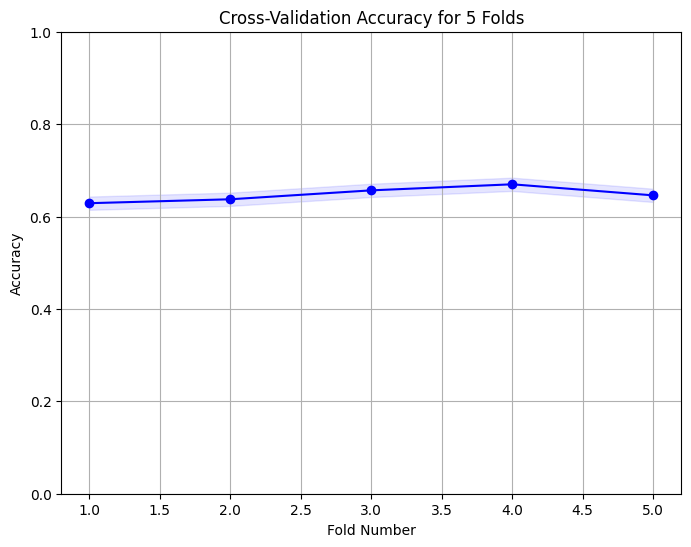

In [41]:
cv_scores = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", mean_cv_score)
print("Standard deviation of cross-validation score:", std_cv_score)

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.fill_between(range(1, 6), cv_scores - std_cv_score, cv_scores + std_cv_score, color='blue', alpha=0.1)
plt.title("Cross-Validation Accuracy for 5 Folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.grid(True)
plt.show()